In [1]:

from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
import pandas as pd


In [3]:
df= pd.read_csv("/gdrive/My Drive/Colab Notebooks/bbc.csv")  #Scrape from BBC NEWS with George FLoyd
df.head(5)

,web-scraper-order,web-scraper-start-url,pagenation,pagenation-href,titles
0,1591606776-509,https://www.bbc.co.uk/search?q=George+Floyd&pa...,9.0,https://www.bbc.co.uk/search?q=George+Floyd&pa...,George Floyd: Five pieces of context to unders...
1,1591606714-357,https://www.bbc.co.uk/search?q=George+Floyd&pa...,24.0,https://www.bbc.co.uk/search?q=George+Floyd&pa...,George Floyd death: Ex-officer charged with mu...
2,1591606763-474,https://www.bbc.co.uk/search?q=George+Floyd&pa...,12.0,https://www.bbc.co.uk/search?q=George+Floyd&pa...,George Floyd death: PM urged to tell Trump to ...
3,1591606698-314,https://www.bbc.co.uk/search?q=George+Floyd&pa...,28.0,https://www.bbc.co.uk/search?q=George+Floyd&pa...,Ely: Police 'examine' video of white officer q...
4,1591606780-511,https://www.bbc.co.uk/search?q=George+Floyd&pa...,8.0,https://www.bbc.co.uk/search?q=George+Floyd&pa...,BBC News: George Floyd honoured in memorial se...


In [4]:
df.shape

(290, 5)

In [5]:
df['titles']

0      George Floyd: Five pieces of context to unders...
1      George Floyd death: Ex-officer charged with mu...
2      George Floyd death: PM urged to tell Trump to ...
3      Ely: Police 'examine' video of white officer q...
4      BBC News: George Floyd honoured in memorial se...
                             ...                        
285    George Floyd: Michael Jordan, Jadon Sancho, Se...
286           Focus: USA's History with Police Brutality
287    Uplifting moments from peaceful George Floyd p...
288                  Talking Movies: Documentary Special
289    World Business Report: Anti-racism protests co...
Name: titles, Length: 290, dtype: object

In [6]:
df.describe

<bound method NDFrame.describe of     web-scraper-order  ...                                             titles
0      1591606776-509  ...  George Floyd: Five pieces of context to unders...
1      1591606714-357  ...  George Floyd death: Ex-officer charged with mu...
2      1591606763-474  ...  George Floyd death: PM urged to tell Trump to ...
3      1591606698-314  ...  Ely: Police 'examine' video of white officer q...
4      1591606780-511  ...  BBC News: George Floyd honoured in memorial se...
..                ...  ...                                                ...
285    1591606722-376  ...  George Floyd: Michael Jordan, Jadon Sancho, Se...
286    1591606698-320  ...         Focus: USA's History with Police Brutality
287    1591606763-479  ...  Uplifting moments from peaceful George Floyd p...
288    1591606706-336  ...                Talking Movies: Documentary Special
289    1591606706-334  ...  World Business Report: Anti-racism protests co...

[290 rows x 5 columns]>

In [ ]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'pagenation',
       'pagenation-href', 'titles'],
      dtype='object')

In [ ]:
from collections import Counter

In [ ]:
df['titles'].astype(str).str.split('[\W_]+'
)

0      [George, Floyd, Five, pieces, of, context, to,...
1      [George, Floyd, death, Ex, officer, charged, w...
2      [George, Floyd, death, PM, urged, to, tell, Tr...
3      [Ely, Police, examine, video, of, white, offic...
4      [BBC, News, George, Floyd, honoured, in, memor...
                             ...                        
285    [George, Floyd, Michael, Jordan, Jadon, Sancho...
286    [Focus, USA, s, History, with, Police, Brutality]
287    [Uplifting, moments, from, peaceful, George, F...
288              [Talking, Movies, Documentary, Special]
289    [World, Business, Report, Anti, racism, protes...
Name: titles, Length: 290, dtype: object

In [ ]:
#Count most common words in column ['titles']
from collections import Counter   
total_counts = Counter(" ".join(df["titles"]).replace(":", "").replace("to","").replace("the","").replace("and","").replace('in',"").replace("on",'').replace("of","").replace("The","").split()).most_common(15)

total_counts

[('George', 242),
 ('Floyd', 234),
 ('death', 130),
 ('protests', 62),
 ('US', 36),
 ('protest', 27),
 ('for', 24),
 ('police', 18),
 ('Trump', 16),
 ('BBC', 15),
 ('over', 15),
 ('says', 15),
 ('News', 14),
 ('a', 14),
 ('at', 14)]

In [ ]:
#Convert my list to a Dataframe
df1 = pd.DataFrame(total_counts) 
df1

,0,1
0,George,242
1,Floyd,234
2,death,130
3,protests,62
4,US,36
5,protest,27
6,for,24
7,police,18
8,Trump,16
9,BBC,15


In [ ]:
#Rename columns
df1.rename({0:"words", 1: "frequency"}, axis= 1, inplace=True)

df1

,words,frequency
0,George,242
1,Floyd,234
2,death,130
3,protests,62
4,US,36
5,protest,27
6,for,24
7,police,18
8,Trump,16
9,BBC,15


In [ ]:
df1.set_index("words", inplace=True)

In [ ]:
import matplotlib.pyplot as plt

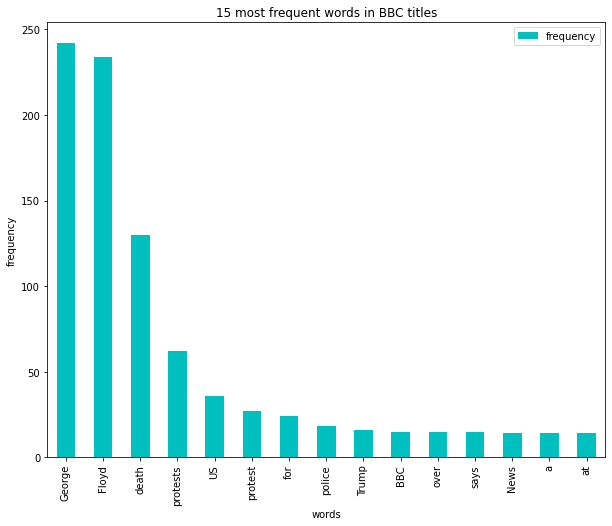

In [ ]:
df1.plot(kind='bar', figsize= (10,8), color= 'c')
plt.xlabel('words')
plt.ylabel('frequency')
plt.title("15 most frequent words in BBC titles")
plt.savefig("/gdrive/My Drive/Colab Notebooks/frequent_words.png",transparent= True,bbox_inches= 'tight')

In [ ]:
#sentiment analysis BBC 

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
import pandas as pd


In [ ]:

analyser = SentimentIntensityAnalyzer()

In [ ]:

new_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/bbc.csv', nrows=340)

In [ ]:
new_df.head(1)

,web-scraper-order,web-scraper-start-url,pagenation,pagenation-href,titles
0,1591606776-509,https://www.bbc.co.uk/search?q=George+Floyd&pa...,9.0,https://www.bbc.co.uk/search?q=George+Floyd&pa...,George Floyd: Five pieces of context to unders...


In [ ]:
new_df['sentTitle'] = new_df['titles'].apply(lambda x : analyser.polarity_scores(x)['compound'])

In [ ]:
new_df.head(5)

,web-scraper-order,web-scraper-start-url,pagenation,pagenation-href,titles,sentTitle
0,1591606776-509,https://www.bbc.co.uk/search?q=George+Floyd&pa...,9.0,https://www.bbc.co.uk/search?q=George+Floyd&pa...,George Floyd: Five pieces of context to unders...,-0.2263
1,1591606714-357,https://www.bbc.co.uk/search?q=George+Floyd&pa...,24.0,https://www.bbc.co.uk/search?q=George+Floyd&pa...,George Floyd death: Ex-officer charged with mu...,-0.8860
2,1591606763-474,https://www.bbc.co.uk/search?q=George+Floyd&pa...,12.0,https://www.bbc.co.uk/search?q=George+Floyd&pa...,George Floyd death: PM urged to tell Trump to ...,-0.2023
3,1591606698-314,https://www.bbc.co.uk/search?q=George+Floyd&pa...,28.0,https://www.bbc.co.uk/search?q=George+Floyd&pa...,Ely: Police 'examine' video of white officer q...,0.0000
4,1591606780-511,https://www.bbc.co.uk/search?q=George+Floyd&pa...,8.0,https://www.bbc.co.uk/search?q=George+Floyd&pa...,BBC News: George Floyd honoured in memorial se...,0.4939


In [ ]:
# Πολικότητα τίτλων άρθρων BBC

In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Polarity  of BBC titles')

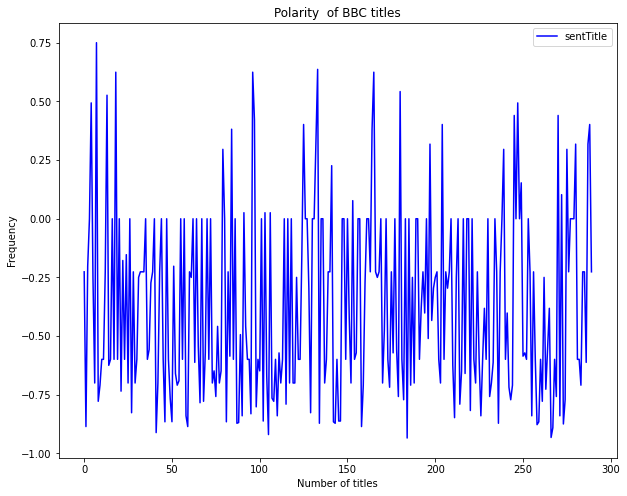

In [ ]:
ax1= new_df.plot(y='sentTitle',color='b',figsize=(10,8))
plt.xlabel('Number of titles')
plt.ylabel("Frequency")
plt.title('Polarity  of BBC titles')


In [ ]:
import spacy

In [ ]:
!python -m spacy download en_core_web_sm #Install english version of spacy

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:

nlp = spacy.load('en_core_web_sm')

In [ ]:
list(nlp.Defaults.stop_words)

['none',
 "'re",
 'am',
 'behind',
 'nine',
 'than',
 'also',
 '’s',
 'they',
 'yourselves',
 "'ve",
 'whereafter',
 'by',
 'yet',
 'their',
 'ours',
 'upon',
 'whom',
 'another',
 'had',
 '’re',
 'quite',
 'via',
 'that',
 'used',
 'next',
 'those',
 'not',
 'them',
 'she',
 'sometime',
 'bottom',
 'became',
 'get',
 'beforehand',
 'see',
 'nevertheless',
 'this',
 'even',
 'herself',
 'whence',
 'nor',
 'toward',
 'among',
 'three',
 'throughout',
 'seemed',
 'was',
 'much',
 'n‘t',
 'against',
 'should',
 'already',
 'therein',
 'be',
 'does',
 'whenever',
 'keep',
 'have',
 'anything',
 'very',
 'in',
 'fifteen',
 'but',
 'many',
 'forty',
 'why',
 'were',
 'less',
 'becoming',
 'formerly',
 'per',
 'someone',
 'front',
 'can',
 'one',
 'each',
 'now',
 'various',
 'put',
 'through',
 'and',
 'four',
 'though',
 'will',
 'else',
 'itself',
 'without',
 'is',
 '‘re',
 '’m',
 'after',
 'for',
 'side',
 'top',
 '‘m',
 'around',
 'whether',
 'hence',
 'beside',
 'eight',
 'into',
 'ser

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(new_df['titles'])

In [ ]:
count_vector.shape

(290, 853)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,06,07,100m,19,1m,1xtra,2020,26,27,500,80,ablaze,aboriginal,about,abuse,abused,across,action,activism,actor,adds,aerial,african,after,again,against,ahead,all,allan,ally,am,america,american,americans,americast,amfo,amid,an,and,anfield,...,violent,virus,visit,visitors,voice,voices,wales,walk,walker,wars,was,washington,watch,wave,ways,we,week,weekly,welsh,were,west,what,when,white,who,whose,why,widespread,wilkin,will,williams,with,world,year,years,yedlin,york,yorkshire,young,your
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [ ]:

from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(new_df['titles'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['-PRON-', 'regard', 'use'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,-PRON-,african,america,american,amid,anti,arrest,attack,attend,bbc,birmingham,black,blackout,bristol,brother,brutality,business,charge,chief,city,clash,continue,conversation,coronavirus,council,coventry,crowd,custody,day,death,defy,demonstrator,die,dismantle,documentary,england,floyd,focus,gather,george,...,racism,raheem,rally,rapper,reaction,report,respect,sack,sancho,service,shock,slave,solidarity,speak,special,speech,spike,sport,spread,star,statue,sterling,talk,thing,thousand,time,troop,trump,tuesday,turn,unrest,urge,video,violence,violent,wales,washington,welsh,white,world
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(new_df['titles'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,anti,bbc,black,death,floyd,george,join,memorial,minneapolis,news,os,police,protest,protesters,protests,racism,says,thousands,trump,uk
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(new_df['titles'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,anti racism,bbc os,black lives,business report,conversations race,death george,death protests,death thousands,floyd black,floyd death,floyd memorial,floyd protest,floyd protests,george floyd,global news,lives matter,news podcast,os george,police brutality,racism protests
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


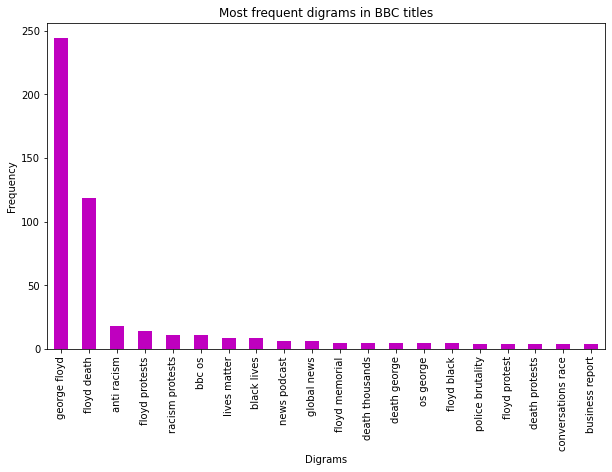

In [ ]:

results.sum(axis =0).sort_values(ascending = False).plot(kind= 'bar', figsize= (10,6), color= 'm')
plt.xlabel("Digrams")
plt.ylabel("Frequency")
plt.title("Most frequent digrams in BBC titles") # 20 most frequent digrams in Trumps twitter
plt.savefig("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/Digrams_BBC.png",transparent= True,bbox_inches= 'tight')

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['titles'])  #finds the tfidf score with normalization

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
df = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

,anti racism,bbc os,black lives,business report,conversations race,death george,death protests,death thousands,floyd black,floyd death,floyd memorial,floyd protest,floyd protests,george floyd,global news,lives matter,news podcast,os george,police brutality,racism protests
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[8], tfidf_matrix_train))  

cosine scores ==>  [[0.02604059 0.02583382 0.11830899 0.10817974 0.0269431  0.02360874
  0.02621439 0.         1.         0.0327017  0.02321943 0.17377312
  0.         0.02429012 0.0221536  0.02976796 0.14511627 0.02619083
  0.0366205  0.02219031 0.03636865 0.02090142 0.01768184 0.02946845
  0.02491691 0.11946069 0.13430646 0.02441996 0.02693867 0.02813028
  0.0303945  0.02497811 0.02825744 0.11051923 0.02535536 0.02798062
  0.0269236  0.0288584  0.02439868 0.0221822  0.         0.02575246
  0.03524054 0.05475574 0.12208645 0.02360603 0.03386856 0.
  0.0199972  0.         0.04885921 0.16819253 0.11677856 0.02968217
  0.02999037 0.02773797 0.02684141 0.         0.02475188 0.0287602
  0.1047165  0.         0.02481815 0.02156289 0.02235449 0.03946577
  0.04972866 0.         0.02725689 0.03776768 0.02673541 0.03567422
  0.12942265 0.02643962 0.         0.13923481 0.         0.03361196
  0.         0.02135015 0.         0.03251286 0.         0.02746357
  0.02697386 0.02752446 0.         0.0

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  

cosine scores ==>  [[1.         0.02342053 0.01805758 ... 0.08247726 0.         0.04440315]
 [0.02342053 1.         0.0385398  ... 0.02578638 0.         0.        ]
 [0.01805758 0.0385398  1.         ... 0.01988169 0.         0.        ]
 ...
 [0.08247726 0.02578638 0.01988169 ... 1.         0.         0.04888858]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.04440315 0.         0.         ... 0.04888858 0.         1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

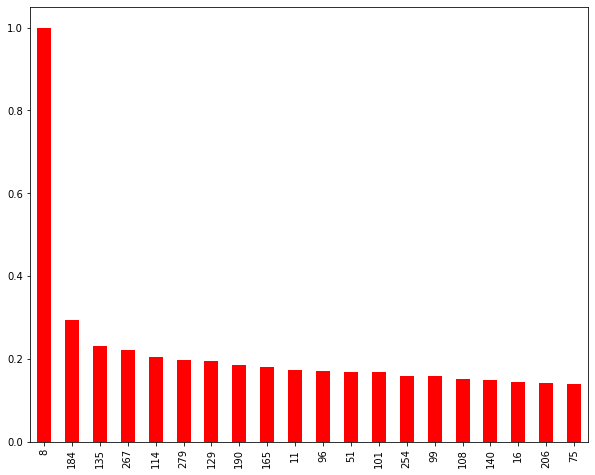

In [ ]:
pd.DataFrame(arr).loc[8].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize= (10,8), color='r')
plt.savefig("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/cosine_similarity_BBC_titles.png",transparent= True,bbox_inches= 'tight')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df1= pd.read_csv("/gdrive/My Drive/Colab Notebooks/bbc.csv") 

In [ ]:
df1['titles'].loc[8]

'George Floyd: What has Trump done for black jobs, poverty and crime?'

In [ ]:
df1['titles'].loc[267]

'George Floyd death: Trump denies protests forced him into bunker'

In [ ]:
df1['titles'].loc[279]

'George Floyd: Can President Trump deploy the military?'

In [ ]:
df1['titles'].loc[254]

"George Floyd protests: Trump dispatching 'thousands' of troops and police"

In [ ]:
df1['titles'].loc[184]

"Teens arrested for 'hate crime' photo of George Floyd death"

In [ ]:
df1['titles'].loc[190]

'George Floyd: ‘As a black American I am terrified’'

2.ΑΝΑΛΥΣΗ CNN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df2= pd.read_excel("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/Scrape CNN.xlsx", sep=',') 

In [ ]:
df2.head(5)


,Title,Title_URL,Image,cnnsearch__resultpublishdate,cnnsearch__resultbody,Text
0,Black Lives Matter protests across the US and ...,https://www.cnn.com/us/live-news/george-floyd-...,https://cdn.cnn.com/cnnnext/dam/assets/2006081...,"Jun 10, 2020",Minneapolis Mayor Jacob Frey slammed the leade...,NaN
1,Capitol Hill Republicans watch Trump's eroding...,https://www.cnn.com/2020/06/10/politics/republ...,https://cdn.cnn.com/cnnnext/dam/assets/1812211...,"Jun 10, 2020",GOP senators are anxiously watching President ...,NaN
2,Trump campaign demands CNN apologize for poll ...,https://www.cnn.com/2020/06/10/politics/trump-...,https://cdn.cnn.com/cnnnext/dam/assets/2006042...,"Jun 10, 2020",President Donald Trump's campaign is demanding...,NaN
3,Democratic lawmakers call for vote on bill to ...,https://www.cnn.com/2020/06/10/politics/repara...,https://cdn.cnn.com/cnnnext/dam/assets/2006091...,"Jun 10, 2020",Among the policy proposals in Congress in the ...,I Accept
4,The PGA Tour will leave the 8:46 tee time open...,https://www.cnn.com/2020/06/10/us/pga-tour-tee...,https://cdn.cnn.com/cnnnext/dam/assets/2006101...,"Jun 10, 2020",The PGA Tour plans to honor George Floyd and t...,I Accept


In [ ]:
df2.shape

(339, 6)

In [ ]:
df2['Title']

0      Black Lives Matter protests across the US and ...
1      Capitol Hill Republicans watch Trump's eroding...
2      Trump campaign demands CNN apologize for poll ...
3      Democratic lawmakers call for vote on bill to ...
4      The PGA Tour will leave the 8:46 tee time open...
                             ...                        
334          US black-white inequality in 6 stark charts
335    This man sheltered dozens of protesters in his...
336    Trump and Biden clash as George Floyd's killin...
337    What you need to know about coronavirus on Wed...
338    5 things to know for June 3: Protests, coronav...
Name: Title, Length: 339, dtype: object

In [ ]:
from collections import Counter

In [ ]:
df2['Title'].astype(str).str.split('[\W_]+'
)

0      [Black, Lives, Matter, protests, across, the, ...
1      [Capitol, Hill, Republicans, watch, Trump, s, ...
2      [Trump, campaign, demands, CNN, apologize, for...
3      [Democratic, lawmakers, call, for, vote, on, b...
4      [The, PGA, Tour, will, leave, the, 8, 46, tee,...
                             ...                        
334    [US, black, white, inequality, in, 6, stark, c...
335    [This, man, sheltered, dozens, of, protesters,...
336    [Trump, and, Biden, clash, as, George, Floyd, ...
337    [What, you, need, to, know, about, coronavirus...
338    [5, things, to, know, for, June, 3, Protests, ...
Name: Title, Length: 339, dtype: object

In [ ]:
#Count most common words in column ['titles']
from collections import Counter   
total_counts = Counter(" ".join(df2["Title"]).replace(":", "").replace("to","").replace("the","").replace("and","").replace('in',"").replace("on",'').replace("of","").split()).most_common(15)

total_counts

[('George', 72),
 ('a', 52),
 ('police', 51),
 ('Trump', 48),
 ('for', 44),
 ('Floyd', 38),
 ('is', 37),
 ('protests', 36),
 ('says', 30),
 ("Floyd's", 29),
 ("Trump's", 26),
 ('with', 26),
 ('The', 26),
 ('as', 26),
 ('from', 21)]

In [ ]:
#Convert my list to a Dataframe
new_df2 = pd.DataFrame(total_counts) 
new_df2

,0,1
0,George,72
1,a,52
2,police,51
3,Trump,48
4,for,44
5,Floyd,38
6,is,37
7,protests,36
8,says,30
9,Floyd's,29


In [ ]:
#Rename columns
new_df2.rename({0:"words", 1: "frequency"}, axis= 1, inplace=True)

new_df2

,words,frequency
0,George,72
1,a,52
2,police,51
3,Trump,48
4,for,44
5,Floyd,38
6,is,37
7,protests,36
8,says,30
9,Floyd's,29


In [ ]:
new_df2.set_index("words", inplace=True)

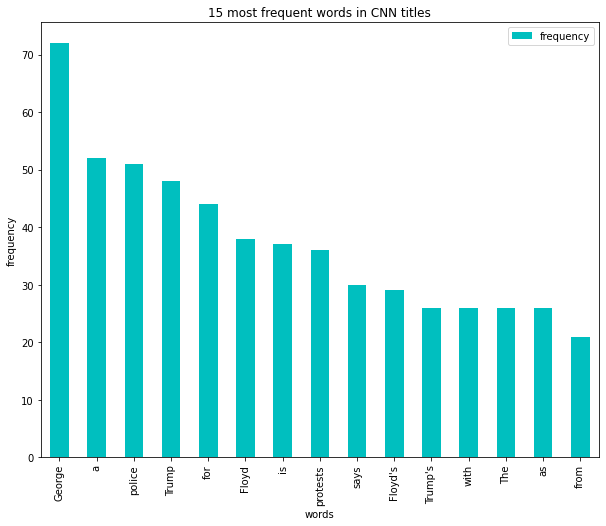

In [ ]:
new_df2.plot(kind='bar', figsize= (10,8), color= 'c')
plt.xlabel('words')
plt.ylabel('frequency')
plt.title("15 most frequent words in CNN titles")
plt.savefig("/gdrive/My Drive/Colab Notebooks/frequent_words_CNN.png",transparent= True,bbox_inches= 'tight')

In [ ]:
#Sentiment anlysis

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
analyser = SentimentIntensityAnalyzer()

In [ ]:
df2.head(1)

,Title,Title_URL,Image,cnnsearch__resultpublishdate,cnnsearch__resultbody,Text
0,Black Lives Matter protests across the US and ...,https://www.cnn.com/us/live-news/george-floyd-...,https://cdn.cnn.com/cnnnext/dam/assets/2006081...,"Jun 10, 2020",Minneapolis Mayor Jacob Frey slammed the leade...,NaN


In [ ]:
df2['sentTitle'] = df2['Title'].apply(lambda x : analyser.polarity_scores(x)['compound'])

In [ ]:
df2.head(1)

,Title,Title_URL,Image,cnnsearch__resultpublishdate,cnnsearch__resultbody,Text,sentTitle
0,Black Lives Matter protests across the US and ...,https://www.cnn.com/us/live-news/george-floyd-...,https://cdn.cnn.com/cnnnext/dam/assets/2006081...,"Jun 10, 2020",Minneapolis Mayor Jacob Frey slammed the leade...,NaN,-0.2023


In [ ]:
# Πολικότητα τίτλων άρθρων CNN

Text(0.5, 1.0, 'Polarity  of CNN titles')

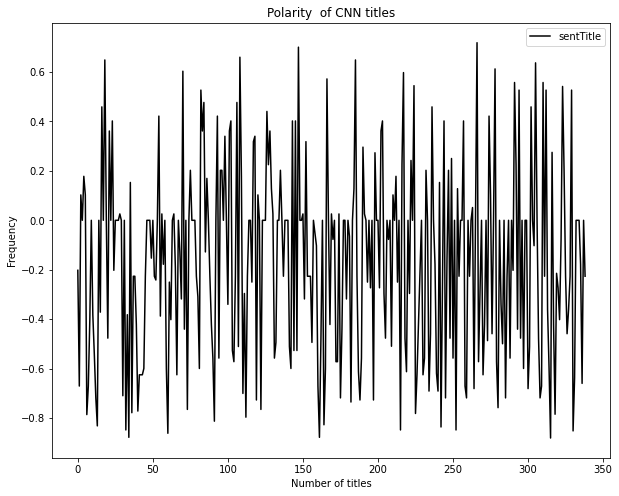

In [ ]:
ax1= df2.plot(y='sentTitle', figsize=(10,8), color='k')
plt.xlabel("Number of titles")
plt.ylabel("Frequency")
plt.title('Polarity  of CNN titles')

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
list(nlp.Defaults.stop_words)

['none',
 "'re",
 'am',
 'behind',
 'nine',
 'than',
 'also',
 '’s',
 'they',
 'yourselves',
 "'ve",
 'whereafter',
 'by',
 'yet',
 'their',
 'ours',
 'upon',
 'whom',
 'another',
 'had',
 '’re',
 'quite',
 'via',
 'that',
 'used',
 'next',
 'those',
 'not',
 'them',
 'she',
 'sometime',
 'bottom',
 'became',
 'get',
 'beforehand',
 'see',
 'nevertheless',
 'this',
 'even',
 'herself',
 'whence',
 'nor',
 'toward',
 'among',
 'three',
 'throughout',
 'seemed',
 'was',
 'much',
 'n‘t',
 'against',
 'should',
 'already',
 'therein',
 'be',
 'does',
 'whenever',
 'keep',
 'have',
 'anything',
 'very',
 'in',
 'fifteen',
 'but',
 'many',
 'forty',
 'why',
 'were',
 'less',
 'becoming',
 'formerly',
 'per',
 'someone',
 'front',
 'can',
 'one',
 'each',
 'now',
 'various',
 'put',
 'through',
 'and',
 'four',
 'though',
 'will',
 'else',
 'itself',
 'without',
 'is',
 '‘re',
 '’m',
 'after',
 'for',
 'side',
 'top',
 '‘m',
 'around',
 'whether',
 'hence',
 'beside',
 'eight',
 'into',
 'ser

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(df2['Title'])

In [ ]:
results1 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results1.head()


,000,10,100,10k,19,2016,2020,24,25,27,31,39,46,600,63,75,800,able,abolish,about,abrams,abuse,abusing,accountability,acknowledge,acknowledges,aclu,across,act,action,actions,activate,active,activism,activist,activists,ad,admitted,advise,adviser,...,whiplash,white,who,whose,why,widespread,will,willing,wilmington,wing,wiped,with,withdraw,withdrawing,without,withstood,witnessing,woman,women,won,words,work,workers,world,worlds,worldwide,worries,worst,worth,would,wounded,wrong,wrongdoing,year,years,york,you,young,your,youth
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)


In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df2['Title'])
result1 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results1.head()






/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['-PRON-', 'regard', 'use'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,000,10,100,10k,19,2016,2020,24,25,27,31,39,46,600,63,75,800,able,abolish,about,abrams,abuse,abusing,accountability,acknowledge,acknowledges,aclu,across,act,action,actions,activate,active,activism,activist,activists,ad,admitted,advise,adviser,...,whiplash,white,who,whose,why,widespread,will,willing,wilmington,wing,wiped,with,withdraw,withdrawing,without,withstood,witnessing,woman,women,won,words,work,workers,world,worlds,worldwide,worries,worst,worth,would,wounded,wrong,wrongdoing,year,years,york,you,young,your,youth
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df2['Title'])
results1 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results1.head()


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,biden,black,coronavirus,dc,death,floyd,george,house,june,man,matter,new,officers,police,protesters,protests,racism,says,trump,white
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df2['Title'])
results1 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results1.head()


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,black lives,dc mayor,donald trump,floyd death,floyd protests,george floyd,joe biden,june george,know june,law enforcement,lives matter,mayor says,new york,peaceful protesters,police officer,police reform,systemic racism,things know,white house,year old
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


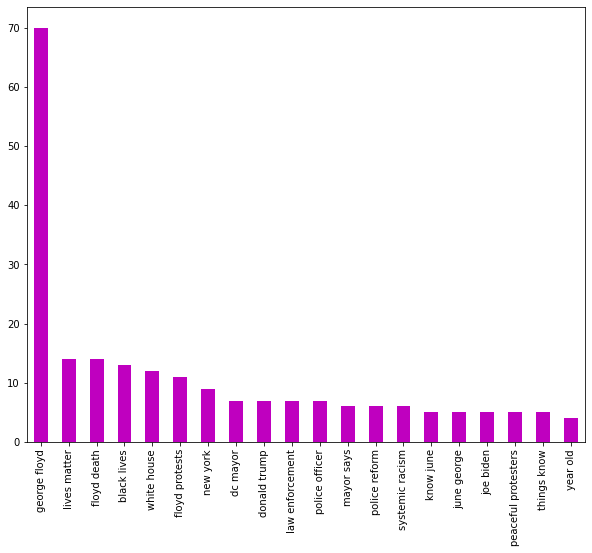

In [ ]:
results1.sum(axis =0).sort_values(ascending = False).plot(kind= 'bar', figsize= (10,8), color= 'm') # 20 most frequent digrams in Trumps twitter
plt.savefig("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/Digrams_CNN.png",transparent= True,bbox_inches= 'tight')



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer



In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df2['Title'])  #finds the tfidf score with normalization


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
df2 = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results1.head()



,black lives,dc mayor,donald trump,floyd death,floyd protests,george floyd,joe biden,june george,know june,law enforcement,lives matter,mayor says,new york,peaceful protesters,police officer,police reform,systemic racism,things know,white house,year old
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[8], tfidf_matrix_train))  



cosine scores ==>  [[0.         0.         0.         0.         0.         0.
  0.35461152 0.         1.         0.         0.         0.05404847
  0.04752778 0.06513808 0.         0.         0.         0.10589593
  0.         0.         0.05279818 0.         0.04351992 0.
  0.         0.         0.         0.20622355 0.         0.
  0.         0.         0.         0.         0.         0.
  0.09593561 0.09871258 0.04523142 0.         0.04525037 0.
  0.         0.         0.         0.         0.17699513 0.
  0.         0.         0.070655   0.1105123  0.         0.05557289
  0.         0.         0.         0.         0.         0.
  0.05246161 0.         0.         0.05651006 0.         0.
  0.17302584 0.         0.06635928 0.         0.         0.
  0.         0.04989835 0.09833151 0.         0.         0.
  0.         0.         0.07540925 0.         0.06250151 0.
  0.         0.         0.         0.19331846 0.0472062  0.04504147
  0.08580858 0.08245437 0.06566609 0.         0. 

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  

cosine scores ==>  [[1.         0.         0.         ... 0.         0.         0.08813554]
 [0.         1.         0.0402783  ... 0.04620079 0.         0.        ]
 [0.         0.0402783  1.         ... 0.16852112 0.         0.        ]
 ...
 [0.         0.04620079 0.16852112 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.45902812]
 [0.08813554 0.         0.         ... 0.         0.45902812 1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

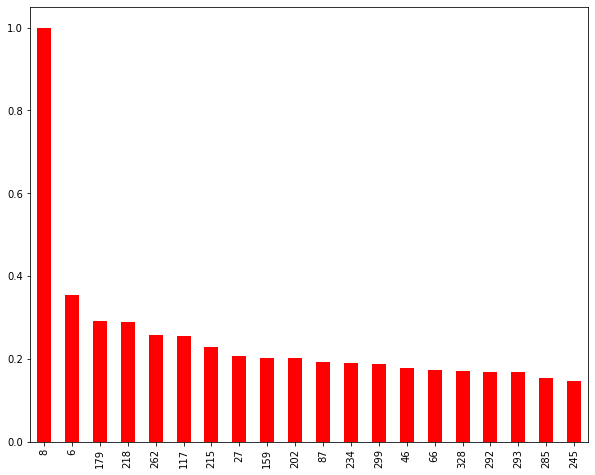

In [ ]:
pd.DataFrame(arr).loc[8].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize= (10,8), color='r')
plt.savefig("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/CNN.png",transparent= True,bbox_inches= 'tight')


In [ ]:
df2= pd.read_excel("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/Scrape CNN.xlsx") 


In [ ]:
df2['Title'].loc[328]

'Louisville BBQ man who was fatally shot when police dispersed crowd used to feed officers for free'

In [ ]:
df2['Title'].loc[299]

'New video appears to show three police officers kneeling on George Floyd'

In [ ]:
df2['Title'].loc[293]

'Pentagon chief on shaky ground with White House after breaking with Trump over protest response'

In [ ]:
df2['Title'].loc[292]

'Houston police officers pay their respects to George Floyd at a mural in his hometown'

In [ ]:
df2['Title'].loc[285]

"Ferguson's first black elected mayor says videos of police abuse help to get rid of bad officers"

3.ΑΝΑΛΥΣΗ REUTERS

In [ ]:
df3= pd.read_csv("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/reuters.csv", sep=',') 

In [ ]:
df3.head(5)

,web-scraper-order,web-scraper-start-url,url,url-href
0,1592901117-506,https://www.reuters.com/search/news?blob=Georg...,Olympics-NZOC supports athletes' right to spea...,https://www.reuters.com/article/idUSL4N2DO0WW
1,1592901117-35,https://www.reuters.com/search/news?blob=Georg...,UK's Johnson 'appalled and sickened' by George...,https://www.reuters.com/article/idUSS8N2CU0FY
2,1592901117-551,https://www.reuters.com/search/news?blob=Georg...,Toronto's first black police chief announces s...,https://www.reuters.com/article/idUSKBN23F2X6
3,1592901117-587,https://www.reuters.com/search/news?blob=Georg...,UPDATE 2-University of Washington forecasts 14...,https://www.reuters.com/article/idUSL1N2DM01Z
4,1592901117-438,https://www.reuters.com/search/news?blob=Georg...,"Two New York police shot and wounded, one knif...",https://www.reuters.com/article/idUSKBN23B0G2


In [ ]:
df3.shape

(582, 4)

In [ ]:
df3['url']

0      Olympics-NZOC supports athletes' right to spea...
1      UK's Johnson 'appalled and sickened' by George...
2      Toronto's first black police chief announces s...
3      UPDATE 2-University of Washington forecasts 14...
4      Two New York police shot and wounded, one knif...
                             ...                        
577    Black architect who knew George Floyd hopes to...
578    NYSE holds nearly 9-minute silence in honor of...
579    Britain's Banksy depicts U.S. flag on fire in ...
580    CrossFit chief sorry for tweet on Floyd killin...
581    "Your Pain Is My Pain": global anti-racism pro...
Name: url, Length: 582, dtype: object

In [ ]:
from collections import Counter

In [ ]:
df3['url'].astype(str).str.split('[\W_]+')

0      [Olympics, NZOC, supports, athletes, right, to...
1      [UK, s, Johnson, appalled, and, sickened, by, ...
2      [Toronto, s, first, black, police, chief, anno...
3      [UPDATE, 2, University, of, Washington, foreca...
4      [Two, New, York, police, shot, and, wounded, o...
                             ...                        
577    [Black, architect, who, knew, George, Floyd, h...
578    [NYSE, holds, nearly, 9, minute, silence, in, ...
579    [Britain, s, Banksy, depicts, U, S, flag, on, ...
580    [CrossFit, chief, sorry, for, tweet, on, Floyd...
581    [, Your, Pain, Is, My, Pain, global, anti, rac...
Name: url, Length: 582, dtype: object

In [ ]:
#Count most common words in column ['titles']
from collections import Counter   
total_counts = Counter(" ".join(df3["url"]).replace(":", "").replace("to","").replace("in","").replace("of","").split()).most_common(15)

total_counts

[('Floyd', 147),
 ('George', 134),
 ('protests', 109),
 ('U.S.', 92),
 ('police', 86),
 ('for', 70),
 ('says', 65),
 ('UPDATE', 64),
 ('death', 61),
 ('on', 56),
 ('protest', 50),
 ('by', 46),
 ('over', 46),
 ('after', 44),
 ("Floyd's", 43)]

In [ ]:
#Convert my list to a Dataframe
new_df3 = pd.DataFrame(total_counts) 
new_df3


,0,1
0,Floyd,147
1,George,134
2,protests,109
3,U.S.,92
4,police,86
5,for,70
6,says,65
7,UPDATE,64
8,death,61
9,on,56


In [ ]:
#Rename columns
new_df3.rename({0:"words", 1: "frequency"}, axis= 1, inplace=True)

new_df3

,words,frequency
0,Floyd,147
1,George,134
2,protests,109
3,U.S.,92
4,police,86
5,for,70
6,says,65
7,UPDATE,64
8,death,61
9,on,56


In [ ]:
new_df3.set_index("words", inplace=True)

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

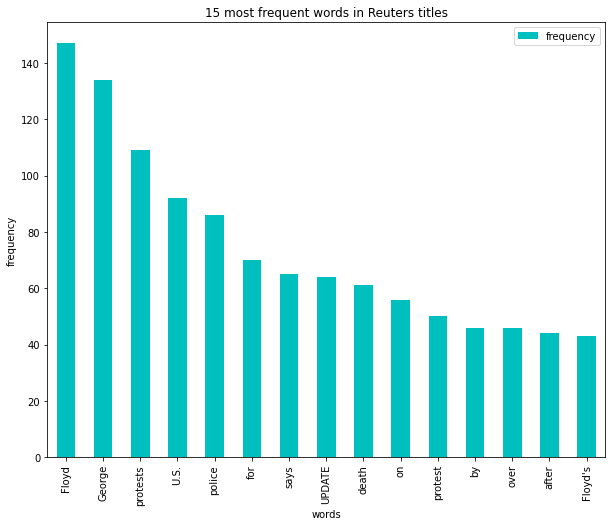

In [ ]:
new_df3.plot(kind='bar', figsize= (10,8), color= 'c')
plt.xlabel('words')
plt.ylabel('frequency')
plt.title("15 most frequent words in Reuters titles")
plt.savefig("/gdrive/My Drive/Colab Notebooks/frequent_words_reuters.png",transparent= True,bbox_inches= 'tight')

In [ ]:
#Sentiment analysis Reuters

In [ ]:
!pip install vaderSentiment

In [ ]:
import pandas as pd

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyser = SentimentIntensityAnalyzer()

In [ ]:
df3.head()

,web-scraper-order,web-scraper-start-url,url,url-href
0,1592901117-506,https://www.reuters.com/search/news?blob=Georg...,Olympics-NZOC supports athletes' right to spea...,https://www.reuters.com/article/idUSL4N2DO0WW
1,1592901117-35,https://www.reuters.com/search/news?blob=Georg...,UK's Johnson 'appalled and sickened' by George...,https://www.reuters.com/article/idUSS8N2CU0FY
2,1592901117-551,https://www.reuters.com/search/news?blob=Georg...,Toronto's first black police chief announces s...,https://www.reuters.com/article/idUSKBN23F2X6
3,1592901117-587,https://www.reuters.com/search/news?blob=Georg...,UPDATE 2-University of Washington forecasts 14...,https://www.reuters.com/article/idUSL1N2DM01Z
4,1592901117-438,https://www.reuters.com/search/news?blob=Georg...,"Two New York police shot and wounded, one knif...",https://www.reuters.com/article/idUSKBN23B0G2


In [ ]:
df3['sentTitle'] = df3['url'].apply(lambda x : analyser.polarity_scores(x)['compound'])

In [ ]:
#Πολικότητα άρθρων Reuters

Text(0.5, 1.0, 'Polarity of Reuters titles')

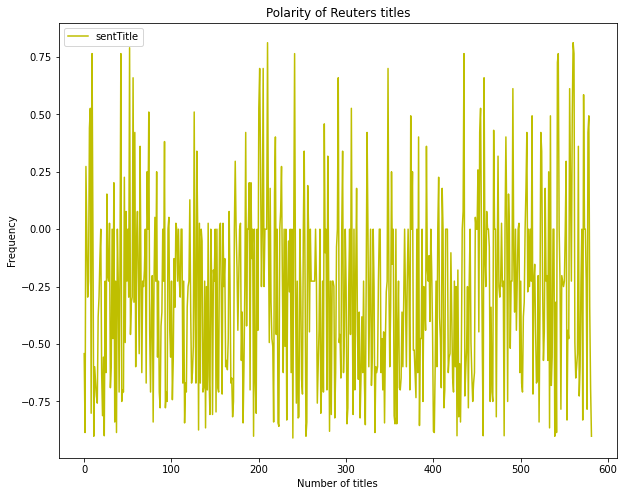

In [ ]:
ax3= df3.plot(y='sentTitle', color ='y', figsize= (10,8))
plt.xlabel("Number of titles")
plt.ylabel("Frequency")
plt.title("Polarity of Reuters titles")

In [ ]:
import spacy

In [ ]:
!python -m spacy download en_core_web_sm #Install english version of spacy

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:

nlp = spacy.load('en_core_web_sm')


In [ ]:
list(nlp.Defaults.stop_words)

['none',
 "'re",
 'am',
 'behind',
 'nine',
 'than',
 'also',
 '’s',
 'they',
 'yourselves',
 "'ve",
 'whereafter',
 'by',
 'yet',
 'their',
 'ours',
 'upon',
 'whom',
 'another',
 'had',
 '’re',
 'quite',
 'via',
 'that',
 'used',
 'next',
 'those',
 'not',
 'them',
 'she',
 'sometime',
 'bottom',
 'became',
 'get',
 'beforehand',
 'see',
 'nevertheless',
 'this',
 'even',
 'herself',
 'whence',
 'nor',
 'toward',
 'among',
 'three',
 'throughout',
 'seemed',
 'was',
 'much',
 'n‘t',
 'against',
 'should',
 'already',
 'therein',
 'be',
 'does',
 'whenever',
 'keep',
 'have',
 'anything',
 'very',
 'in',
 'fifteen',
 'but',
 'many',
 'forty',
 'why',
 'were',
 'less',
 'becoming',
 'formerly',
 'per',
 'someone',
 'front',
 'can',
 'one',
 'each',
 'now',
 'various',
 'put',
 'through',
 'and',
 'four',
 'though',
 'will',
 'else',
 'itself',
 'without',
 'is',
 '‘re',
 '’m',
 'after',
 'for',
 'side',
 'top',
 '‘m',
 'around',
 'whether',
 'hence',
 'beside',
 'eight',
 'into',
 'ser

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(df3['url'])

In [ ]:
results2 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results2.head()

,000,10,100,11,12,14,145,19,2016,2019,21,25,2nd,75,abolishing,about,above,abraham,abumayyaleh,abuses,accused,accuses,across,act,action,activision,activism,activist,activists,actor,ad,additional,address,adds,advice,advisers,afghan,after,again,against,...,wes,what,where,which,while,white,whitney,who,whole,wide,will,windows,with,without,woman,women,won,woods,work,world,worldwide,would,wounded,wrapup,write,year,yellow,yet,york,you,young,youngsters,your,zealand,zealanders,zero,zimbabwe,zone,zoom,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)


In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)


In [ ]:

cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df3['url'])
results2 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results2.head()


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['-PRON-', 'regard', 'use'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,-PRON-,activist,amid,anti,appal,athlete,attend,attorney,australia,autopsy,ban,black,board,break,candidate,ceo,change,charge,check,chief,city,close,cocktail,company,condemn,coronavirus,covid-19,crossfit,cuomo,d.c,damage,death,defy,demand,demonstration,die,diversity,economic,embassy,expose,...,resign,respond,response,right,rights,rise,sancho,seek,shoot,silence,soccer,social,speak,spurs,stand,states,statue,street,support,talk,tear,test,thousand,tribute,trump,tweet,twitter,u.n,u.s,united,update,urge,video,violence,want,washington,white,world,worldwide,york
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df3['url'])
results2 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results2.head()




/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,19,anti,black,death,floyd,george,lives,matter,minneapolis,new,police,protest,protesters,protests,racism,says,trump,uk,update,violence
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df3['url'])
results2 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results2.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,amid protests,anti racism,black lives,covid 19,death george,fact check,floyd death,floyd killing,floyd protests,george floyd,lives matter,minneapolis police,new york,pm johnson,police officer,police violence,protests rage,racism protests,trump says,uk johnson
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


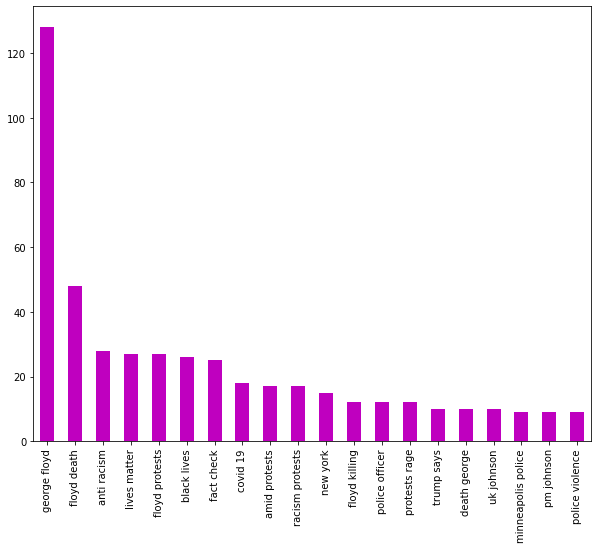

In [ ]:
results2.sum(axis =0).sort_values(ascending = False).plot(kind= 'bar', figsize= (10,8), color= 'm') # 20 most frequent digrams in Trumps twitter
plt.savefig("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/Digrams_Reuters.png",transparent= True,bbox_inches= 'tight')




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
  

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df3['url'])  #finds the tfidf score with normalization


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
df3 = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results2.head()


,amid protests,anti racism,black lives,covid 19,death george,fact check,floyd death,floyd killing,floyd protests,george floyd,lives matter,minneapolis police,new york,pm johnson,police officer,police violence,protests rage,racism protests,trump says,uk johnson
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[:1], tfidf_matrix_train))  

cosine scores ==>  [[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.07994034
  0.         0.         0.         0.         0.         0.
  0.03365544 0.         0.         0.         0.09457432 0.
  0.03050482 0.         0.12618018 0.         0.09299914 0.02822487
  0.         0.         0.         0.         0.13291503 0.
  0.03456795 0.         0.         0.03023484 0.         0.
  0.         0.         0.03895843 0.         0.22811339 0.
  0.         0.03573514 0.         0.         0.         0.03399402
  0.         0.         0.         0.         0.         0.
  0.         0.         0.06725853 0.79474491 0.12575537 0.08652192
  0.         0.03632394 0.         0.         0.         0.04088605
  0.         0.         0.         0.         0.         0.
  0.0368119  0.07155107 0.         0.         0.06400758 0.
  0.         0.02952485 0.         0.0527361  0.         0.
  0.         0.03298063 0.03657339 0.0540

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  



cosine scores ==>  [[1.         0.         0.         ... 0.         0.         0.08178846]
 [0.         1.         0.         ... 0.04217051 0.0283729  0.        ]
 [0.         0.         1.         ... 0.         0.21172429 0.        ]
 ...
 [0.         0.04217051 0.         ... 1.         0.03048006 0.        ]
 [0.         0.0283729  0.21172429 ... 0.03048006 1.         0.        ]
 [0.08178846 0.         0.         ... 0.         0.         1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)




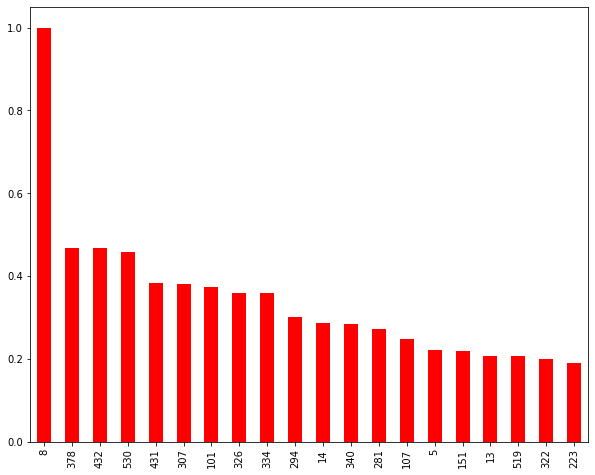

In [ ]:
pd.DataFrame(arr).loc[8].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize= (10,8), color='r')
plt.savefig("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/cosine_similarity_REuters_titles.png",transparent= True,bbox_inches= 'tight')



In [ ]:
df3= pd.read_csv("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/reuters.csv", sep=',') 

In [ ]:
df3['url'].loc[530]


'Black Lives Matter protesters march through Tokyo'

In [ ]:
df3['url'].loc[519]


'Pelosi says legislation coming soon in response to Minneapolis George Floyd killing'

In [ ]:
df3['url'].loc[432]


'Swiss anti-racism protesters march in Geneva during Floyd funeral'

In [ ]:
df3['url'].loc[431]


'Outpouring of rage over George Floyd killing tests limits of U.S. police tactics'

In [ ]:
df3['url'].loc[378]


'Swiss anti-racism protesters march in Geneva during Floyd funeral'

In [7]:
df5= pd.read_excel("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/mediums.xlsx")  

In [8]:
!python -m spacy download en_core_web_sm #Install english version of spacy

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [9]:

filepath = "https://github.com/datajour-gr/Data_journalism/blob/master/week8/Maltezos/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt?raw=true"

In [10]:
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,NaN,0,0,0,0,0,0,0,0,0,0
1,aback,0,0,0,0,0,0,0,0,0,0
2,abacus,0,0,0,0,0,0,0,0,0,1
3,abandon,0,0,0,1,0,1,0,1,0,0
4,abandoned,1,0,0,1,0,1,0,1,0,0


In [19]:
# list of fear words
anger_words = emolex_df[emolex_df.anger == 1]['word']

from sklearn.feature_extraction.text import TfidfVectorizer
# tuning the vectorizer parameters
vectorizer = TfidfVectorizer(vocabulary=anger_words,use_idf=False)

In [20]:
def get_anger(sent):
    vectorizer = TfidfVectorizer(vocabulary=anger_words,use_idf=False)
    i= vectorizer.fit_transform(sent)
    x= i.toarray()
    return(x.sum(axis=1))

In [21]:
from collections import Counter

In [22]:
df5['Title'].astype(str).str.split('[\W_]+'
)

0       [Olympics, NZOC, supports, athletes, right, to...
1       [UK, s, Johnson, appalled, and, sickened, by, ...
2       [Toronto, s, first, black, police, chief, anno...
3       [UPDATE, 2, University, of, Washington, foreca...
4       [Two, New, York, police, shot, and, wounded, o...
                              ...                        
1206    [George, Floyd, Michael, Jordan, Jadon, Sancho...
1207    [Newsday, Minneapolis, might, try, to, dismant...
1208    [George, Floyd, Why, are, there, huge, protest...
1209    [Slave, trader, statue, torn, down, in, Bristo...
1210    [George, Floyd, death, Abused, Ipswich, chef, ...
Name: Title, Length: 1211, dtype: object

In [23]:
#Count most common words in column ['titles']
from collections import Counter   
total_counts = Counter(" ".join(df5["Title"]).replace(":", "").replace("to","").replace("the","").replace("and","").replace('in',"").replace("on",'').replace("of","").replace("The","").split()).most_common()

total_counts

[('George', 448),
 ('Floyd', 419),
 ('protests', 207),
 ('death', 205),
 ('police', 155),
 ('for', 136),
 ('says', 110),
 ('U.S.', 92),
 ('Trump', 92),
 ('a', 90),
 ('protest', 87),
 ("Floyd's", 81),
 ('over', 79),
 ('after', 67),
 ('by', 66),
 ('UPDATE', 64),
 ('is', 63),
 ('as', 61),
 ('with', 61),
 ('protesters', 60),
 ('black', 58),
 ('Mneapolis', 53),
 ('US', 53),
 ('Black', 51),
 ('racism', 48),
 ('Lives', 44),
 ('at', 42),
 ('not', 41),
 ('are', 40),
 ('Matter', 40),
 ('be', 38),
 ('New', 37),
 ('from', 37),
 ('anti-racism', 36),
 ('agast', 33),
 ('amid', 32),
 ('who', 32),
 ("Trump's", 31),
 ('was', 30),
 ('durg', 29),
 ('chief', 28),
 ('Fact', 26),
 ('check', 26),
 ('about', 26),
 ('UK', 26),
 ('his', 26),
 ('Johns', 25),
 ('killg', 25),
 ('respse', 25),
 ('ficer', 25),
 ('June', 25),
 ('say', 25),
 ('House', 24),
 ('ficers', 24),
 ('support', 24),
 ('jo', 24),
 ('man', 24),
 ('Thouss', 24),
 ('Ld', 23),
 ('coravirus', 23),
 ('urges', 23),
 ('up', 21),
 ('-', 21),
 ('charged',

In [24]:
#Convert my list to a Dataframe
new_df5 = pd.DataFrame(total_counts) 
new_df5

,0,1
0,George,448
1,Floyd,419
2,protests,207
3,death,205
4,police,155
...,...,...
3315,Abused,1
3316,Ipswich,1
3317,chef,1
3318,'racism,1


In [25]:
!pip install vaderSentiment

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [27]:

analyser = SentimentIntensityAnalyzer()

In [28]:
new_df5 = pd.read_excel('/gdrive/My Drive/Colab Notebooks//FINAL ESSAY/mediums.xlsx')

In [29]:
new_df5['sentTitle'] = new_df5['Title'].apply(lambda x : analyser.polarity_scores(x)['compound'])

In [30]:
new_df5.head(1)

,Medium,Title,sentTitle
0,reuters,Olympics-NZOC supports athletes' right to spea...,-0.5423


In [31]:
new_df5.to_csv("/gdrive/My Drive/Colab Notebooks/medium_sentiment.csv", index = False)

In [ ]:
#Total polarity of titles.

In [32]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Total polarity of articles')

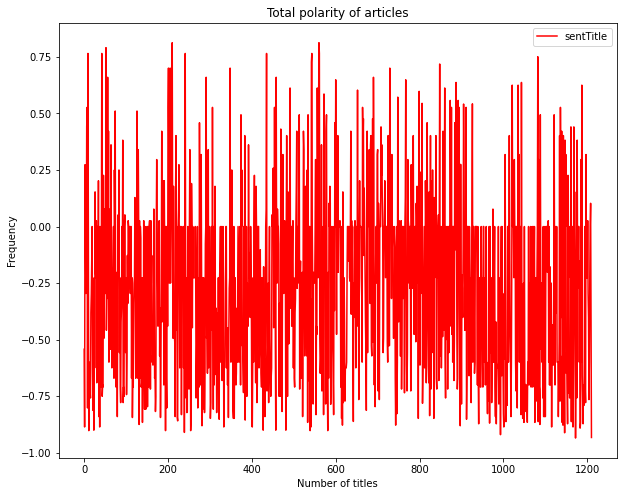

In [33]:
new_df5.plot(y='sentTitle',color='r', figsize=(10,8))
plt.xlabel('Number of titles')
plt.ylabel("Frequency")
plt.title("Total polarity of articles")

In [34]:
import spacy

In [35]:
!python -m spacy download en_core_web_sm #Install english version of spacy

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [36]:

nlp = spacy.load('en_core_web_sm')

In [37]:
list(nlp.Defaults.stop_words)

['elsewhere',
 'make',
 'besides',
 'now',
 'otherwise',
 'which',
 'perhaps',
 'why',
 'anything',
 '’d',
 'using',
 'unless',
 'each',
 'along',
 'sometime',
 'one',
 'bottom',
 'neither',
 'three',
 'whence',
 'two',
 '’re',
 'us',
 'seems',
 'whole',
 'whither',
 'hundred',
 'upon',
 'would',
 'its',
 'never',
 'am',
 'may',
 "'d",
 '’ve',
 'both',
 'alone',
 'towards',
 'hereafter',
 'used',
 "'s",
 'else',
 'more',
 'yours',
 'beside',
 'whereby',
 'afterwards',
 'do',
 'every',
 'had',
 'per',
 'in',
 'was',
 'your',
 'various',
 'seeming',
 'so',
 "'ve",
 'wherein',
 'who',
 'somehow',
 'then',
 'whoever',
 'wherever',
 'made',
 'whenever',
 'twelve',
 'full',
 'thru',
 '‘ve',
 'their',
 'has',
 'as',
 'further',
 'anywhere',
 'nothing',
 'someone',
 'about',
 'can',
 'twenty',
 'too',
 'hers',
 "'ll",
 'everywhere',
 'whether',
 'once',
 '’ll',
 'ca',
 'mostly',
 'whatever',
 'forty',
 'is',
 'via',
 'n’t',
 'not',
 'amount',
 'down',
 'have',
 'they',
 'that',
 '‘re',
 'least

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [39]:
count_vector = cv.fit_transform(new_df5['Title'])

In [40]:
results3 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results3.head()


,000,06,07,10,100,100m,10k,11,12,14,145,19,1m,1xtra,2016,2019,2020,21,24,25,26,27,2nd,31,39,46,500,600,63,75,80,800,ablaze,able,abolish,abolishing,aboriginal,about,above,abraham,...,withstood,witnessing,woman,women,won,woods,words,work,workers,world,worlds,worldwide,worries,worst,worth,would,wounded,wrapup,write,wrong,wrongdoing,year,years,yedlin,yellow,yet,york,yorkshire,you,young,youngsters,your,youth,zealand,zealanders,zero,zimbabwe,zone,zoom,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)



In [42]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)


In [43]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(new_df5['Title'])
results3 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results3.head()


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['-PRON-', 'regard', 'use'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,-PRON-,america,amid,anti,appal,arrest,ban,biden,black,change,charge,check,chief,city,close,condemn,continue,coronavirus,covid-19,death,die,fact,family,floyd,follow,george,global,governor,group,health,hold,house,johnson,join,june,justice,kill,killing,know,law,...,pandemic,people,police,president,protest,protester,race,racial,racism,rage,rally,reform,remove,report,response,right,shoot,social,speak,statue,street,support,tear,thousand,tribute,trump,tweet,u.n,u.s,unrest,update,urge,use,video,violence,want,washington,white,world,york
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:

cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(new_df5['Title'])
results3 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results3.head()


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,anti,black,coronavirus,death,floyd,george,lives,matter,minneapolis,new,police,protest,protesters,protests,racism,says,thousands,trump,uk,update
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [45]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(new_df5['Title'])
results3 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results3.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,amid protests,anti racism,bbc os,black lives,covid 19,death george,fact check,floyd death,floyd killing,floyd protests,george floyd,lives matter,minneapolis police,new york,police officer,protests rage,racism protests,trump says,uk johnson,white house
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


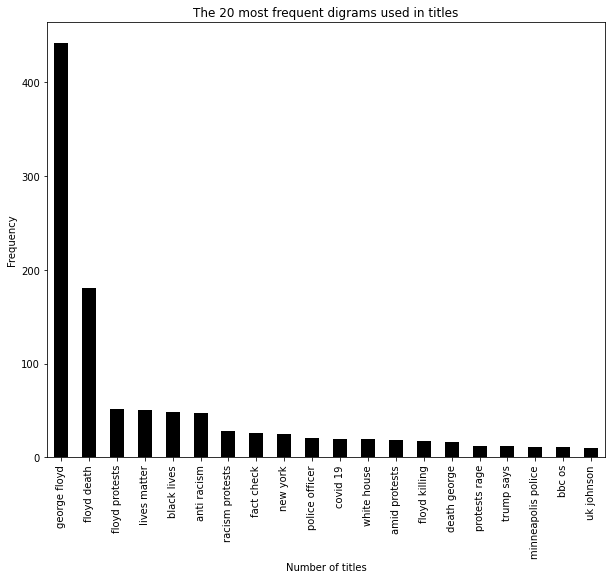

In [46]:


results3.sum(axis =0).sort_values(ascending = False).plot(kind= 'bar', figsize= (10,8), color= 'k')
plt.xlabel('Number of titles')
plt.ylabel("Frequency")
plt.title("The 20 most frequent digrams used in titles")
plt.savefig("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/Medium_digrams.png",transparent= True,bbox_inches= 'tight')


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:

tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(new_df5['Title'])  #finds the tfidf score with normalization


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [49]:
new_df5 = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results3.head()


,amid protests,anti racism,bbc os,black lives,covid 19,death george,fact check,floyd death,floyd killing,floyd protests,george floyd,lives matter,minneapolis police,new york,police officer,protests rage,racism protests,trump says,uk johnson,white house
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [50]:
results3.shape

(1211, 20)

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[1], tfidf_matrix_train))  

cosine scores ==>  [[0.         1.         0.         ... 0.10862285 0.         0.21416319]]


In [53]:

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  


cosine scores ==>  [[1.         0.         0.         ... 0.08264751 0.0740036  0.14126548]
 [0.         1.         0.         ... 0.10862285 0.         0.21416319]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.08264751 0.10862285 0.         ... 1.         0.         0.19765682]
 [0.0740036  0.         0.         ... 0.         1.         0.16027867]
 [0.14126548 0.21416319 0.         ... 0.19765682 0.16027867 1.        ]]


In [54]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

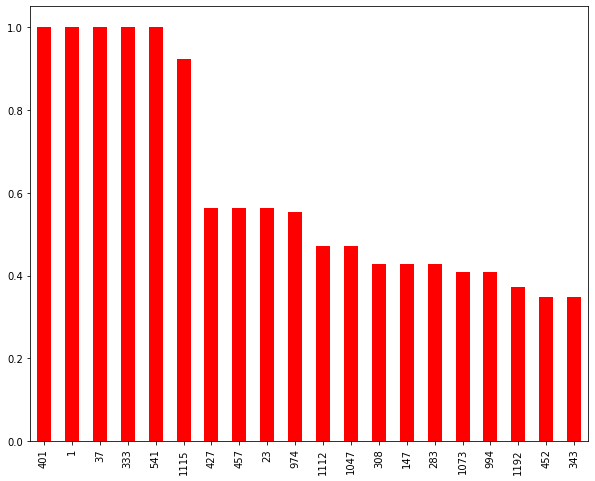

In [61]:
pd.DataFrame(arr).loc[1].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize= (10,8), color='r')
plt.savefig("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/cosine_similarity_medium_titles.png",transparent= True,bbox_inches= 'tight')


In [62]:
df6= pd.read_excel("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/mediums.xlsx") 

In [63]:
df6['Title'].loc[1192]


'George Floyd death: Matt Hancock urges UK public to avoid protests'

In [ ]:
df6['Medium'].loc[1192]

'bbc'

In [ ]:
df6['Title'].loc[1115]


"George Floyd: Boris Johnson 'appalled and sickened' by death"

In [ ]:
df6['Medium'].loc[1115]

'bbc'

In [ ]:
df6['Title'].loc[1112]


"George Floyd death: UK protests are 'unlawful'"

In [ ]:
df6['Medium'].loc[1112]

'bbc'

In [ ]:
df6['Title'].loc[1073]


'Newsbeat: UK Protests for George Floyd'

In [ ]:
df6['Medium'].loc[1073]

'bbc'

In [ ]:
df6['Title'].loc[1047]


'George Floyd death: Why US protests resonate in the UK'

In [ ]:
df6['Medium'].loc[1047]

'bbc'

In [ ]:
df6['Title'].loc[974]

'PMQs: Blackford and Johnson on George Floyd death'

In [ ]:
df6['Medium'].loc[974]

'bbc'

In [ ]:
num_col_one

In [ ]:
df6['Title'].loc[541]

"UK's Johnson 'appalled and sickened' by George Floyd's death"

In [ ]:
df6['Medium'].loc[541]

'reuters'

COSINE SIMILARITY HEATMAP

In [64]:
#Concat all the files from scraping to one file

df6= pd.read_csv("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/medium_sentiment.csv") 

In [69]:
df6

,Medium,Title,sentTitle
0,reuters,Olympics-NZOC supports athletes' right to spea...,-0.5423
1,reuters,UK's Johnson 'appalled and sickened' by George...,-0.8860
2,reuters,Toronto's first black police chief announces s...,0.2732
3,reuters,UPDATE 2-University of Washington forecasts 14...,0.0000
4,reuters,"Two New York police shot and wounded, one knif...",-0.2960
...,...,...,...
1206,bbc,"George Floyd: Michael Jordan, Jadon Sancho, Se...",-0.2263
1207,bbc,Newsday: Minneapolis might try to dismantle th...,0.0000
1208,bbc,George Floyd: Why are there huge protests in t...,0.1027
1209,bbc,Slave trader statue torn down in Bristol anti-...,-0.4588


In [70]:
tot_titles= df6['Title'].tolist()

In [71]:
sentiments= df6['sentTitle'].tolist()

In [72]:
num_titles = len(df6['Title'])
print("A total of " + str(num_titles) + " titles have been collected")

A total of 1211 titles have been collected


In [73]:
# label books as book_1, book_2 .. book_n
title_ids = ["title_" + str(i) for i in range(num_titles)]

# create a dictionary
title_dict = dict(zip(title_ids, sentiments))

# get all the book ids in a list
ids = list(title_dict.keys())

# create all possible pairs
pairs = []
# create a list of tuples
for i, v in enumerate(ids):
    for j in ids[i+1:]:
        pairs.append((ids[i], j))

print("There are a total of " + str(len(pairs)) + " pairs")
print("Displaying first 10 pairs: ")
display(pairs[:50])
print("....")
print("Displaying last 10 pairs: ")
display(pairs[-50:])

There are a total of 732655 pairs
Displaying first 10 pairs: 


[('title_0', 'title_1'),
 ('title_0', 'title_2'),
 ('title_0', 'title_3'),
 ('title_0', 'title_4'),
 ('title_0', 'title_5'),
 ('title_0', 'title_6'),
 ('title_0', 'title_7'),
 ('title_0', 'title_8'),
 ('title_0', 'title_9'),
 ('title_0', 'title_10'),
 ('title_0', 'title_11'),
 ('title_0', 'title_12'),
 ('title_0', 'title_13'),
 ('title_0', 'title_14'),
 ('title_0', 'title_15'),
 ('title_0', 'title_16'),
 ('title_0', 'title_17'),
 ('title_0', 'title_18'),
 ('title_0', 'title_19'),
 ('title_0', 'title_20'),
 ('title_0', 'title_21'),
 ('title_0', 'title_22'),
 ('title_0', 'title_23'),
 ('title_0', 'title_24'),
 ('title_0', 'title_25'),
 ('title_0', 'title_26'),
 ('title_0', 'title_27'),
 ('title_0', 'title_28'),
 ('title_0', 'title_29'),
 ('title_0', 'title_30'),
 ('title_0', 'title_31'),
 ('title_0', 'title_32'),
 ('title_0', 'title_33'),
 ('title_0', 'title_34'),
 ('title_0', 'title_35'),
 ('title_0', 'title_36'),
 ('title_0', 'title_37'),
 ('title_0', 'title_38'),
 ('title_0', 'title_3

....
Displaying last 10 pairs: 


[('title_1200', 'title_1206'),
 ('title_1200', 'title_1207'),
 ('title_1200', 'title_1208'),
 ('title_1200', 'title_1209'),
 ('title_1200', 'title_1210'),
 ('title_1201', 'title_1202'),
 ('title_1201', 'title_1203'),
 ('title_1201', 'title_1204'),
 ('title_1201', 'title_1205'),
 ('title_1201', 'title_1206'),
 ('title_1201', 'title_1207'),
 ('title_1201', 'title_1208'),
 ('title_1201', 'title_1209'),
 ('title_1201', 'title_1210'),
 ('title_1202', 'title_1203'),
 ('title_1202', 'title_1204'),
 ('title_1202', 'title_1205'),
 ('title_1202', 'title_1206'),
 ('title_1202', 'title_1207'),
 ('title_1202', 'title_1208'),
 ('title_1202', 'title_1209'),
 ('title_1202', 'title_1210'),
 ('title_1203', 'title_1204'),
 ('title_1203', 'title_1205'),
 ('title_1203', 'title_1206'),
 ('title_1203', 'title_1207'),
 ('title_1203', 'title_1208'),
 ('title_1203', 'title_1209'),
 ('title_1203', 'title_1210'),
 ('title_1204', 'title_1205'),
 ('title_1204', 'title_1206'),
 ('title_1204', 'title_1207'),
 ('title

In [74]:
df6['Title'].loc[0]

"Olympics-NZOC supports athletes' right to speak up amid racism protests"

In [75]:
df6['Title'].loc[1]

"UK's Johnson 'appalled and sickened' by George Floyd's death"

In [76]:
df6['Title'].loc[2]

"Toronto's first black police chief announces surprise retirement"

In [77]:
df6['Title'].loc[3]

'UPDATE 2-University of Washington forecasts 145,000 U.S. COVID-19 deaths by Aug.'

In [78]:
df6['Title'].loc[4]

'Two New York police shot and wounded, one knifed, while on duty to stop looting'

In [79]:
df6['Title'].loc[5]

'U.S. protesters topple Columbus statue and throw it in a lake'

In [ ]:
df6['Title'].loc[6]

'Cowboys quarterback Prescott pledges $1 million to improve police training'

In [80]:
df6['Title'].loc[7]

"Stephen Jackson rallies for justice for 'brother' Floyd"

In [81]:
df6['Title'].loc[8]

'Emboldened protesters march again, demanding police reforms after Floyd killing'

In [82]:
df6['Title'].loc[9]

'UPDATE 1-UK says expects United States to continue to protect media freedoms'

In [83]:
df6['Title'].loc[10]

"Reddit names Michael Seibel to board after Ohanian's call for black candidate"

In [88]:

# cleanTexttitles takes a list of strings and returns a list of lists
corpus = cleanTexttitles(tot_titles)

# convert list of lists into a list of strings
norm_tot_titles_corpus = [' '.join(title) for title in corpus]

# display normalized corpus
display(norm_tot_titles_corpus)

NameError: ignored

In [89]:
def compute_cosine_similarity(pair):

    # extract the indexes from the pair
    title1, title2 = pair

    # split on _ and get index
    title1_index = int(title1.split("_")[1])
    title2_index = int(title2.split("_")[1])

    # get the feature matrix of the document
    title1_fm = feature_matrix.toarray()[title1_index]
    title2_fm = feature_matrix.toarray()[title2_index]

    # compute cosine similarity manually
    manual_cosine_similarity = np.dot(title1_fm, title2_fm)

    return manual_cosine_similarity

In [90]:
pairwise_cosine_similarity = [compute_cosine_similarity(pair) for pair in pairs]

# create a dataframe
df = pd.DataFrame({'pair': pairs, 'similarity': pairwise_cosine_similarity})
display(df.head())
display(df.tail())

NameError: ignored

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyser = SentimentIntensityAnalyzer()